# THE  🔵   F · R · I · E · N · D · S  🔴  API 🟡

<img width=600 src="https://e00-telva.uecdn.es/assets/multimedia/imagenes/2020/04/22/15875459933127.jpg">

In [1]:
import pandas as pd
import os
import src.downloading_and_cleaning as dc
import src.data as d
import src.sia as sia
import src.frequency as f
from tqdm import tqdm
import json
from pymongo import MongoClient
import requests
import nltk
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from tqdm import tqdm
import matplotlib.pyplot as plt
import collections

### Downloading dataset from kaggle 💻

In [2]:
#dc.download_dataset()

In [3]:
df = pd.read_csv("data/dataset.csv")

### Preparing the data that will be imported to MongoDB ⚡️🚀

#### Cleaning dataframe 🧹

In [4]:
main_characters = ['Joey', 'Chandler', 'Ross', 'Monica', 'Rachel', 'Phoebe', 'Gunther', 'Mike', 'Janice']

In [5]:
df = dc.cleaning(df,main_characters)

In [6]:
df.head()

index    author episode_number           episode_title  \
0      0    Monica              1  Monica Gets A Roommate   
1      1      Joey              1  Monica Gets A Roommate   
2      2  Chandler              1  Monica Gets A Roommate   
3      3    Phoebe              1  Monica Gets A Roommate   
4      4    Phoebe              1  Monica Gets A Roommate   

                                               quote season  
0  There's nothing to tell! He's just some guy I ...      1  
1  C'mon, you're going out with the guy! There's ...      1  
2  All right Joey, be nice. So does he have a hum...      1  
3                           Wait, does he eat chalk?      1  
4  Just, 'cause, I don't want her to go through w...      1

#### Adding a colum with the polarity of each quote

In [7]:
#df["sia"] = df["quote"].apply(sia.sentimentAnalysis)

In [8]:
#df["sentiment"] = df["sia"].apply(sia.grade_to_sent)

In [9]:
#main_sentiment = sia.main_sent(df,main_characters)
main_sentiment = ['neutral', 'positive', 'positive', 'neutral','positive','positive','neutral', 'neutral', 'positive']

#### Counting the most frequent words

In [10]:
stop_words = f.stopwds()

In [11]:
common_word = list((f.commonwds(main_characters,df,stop_words)).values())

In [12]:
common_word

['chandler',
 'joey',
 'joey',
 'phoebe',
 'joey',
 'rachel',
 'joey',
 'love',
 'laughs']

In [13]:
dict_ = { 'character' : main_characters,
         'word' : common_word,
         'sentiment' : main_sentiment
        }

new_df = pd.DataFrame.from_dict(dict_)
new_df

character      word sentiment
0      Joey  chandler   neutral
1  Chandler      joey  positive
2      Ross      joey  positive
3    Monica    phoebe   neutral
4    Rachel      joey  positive
5    Phoebe    rachel  positive
6   Gunther      joey   neutral
7      Mike      love   neutral
8    Janice    laughs  positive

In [14]:
new_df.to_json("friends_json",orient="records")

### Creating a `friends` database with a `quotes` collection in MongoDB 

In [15]:
f = open("script", "w")
f.write("[{}]")
f.close()

In [16]:
url = "http://localhost:5000/newcharacter"

In [17]:
!mongoimport --db friends --collection quotes --jsonArray script

2021-05-01T20:44:42.719+0200	connected to: mongodb://localhost/
2021-05-01T20:44:42.722+0200	1 document(s) imported successfully. 0 document(s) failed to import.


### Adding data to de collection

In [18]:
list_of_characters = ['Joey', 'Chandler', 'Ross', 'Monica', 'Rachel', 'Phoebe', 'Gunther', 'Mike', 'Janice']

In [ ]:
with tqdm(total=len(list_of_characters)) as pbar:
    for character in list_of_characters:
        d.adding_character(df.to_dict(orient='records'),url)
        pbar.update(1)
pbar.close()

  0%|          | 0/9 [00:00<?, ?it/s]

In [ ]:
!mongoimport --db friends --collection quotes --jsonArray friends_json

### EXTRA

In [12]:
words = f.whole_script_common(df,main_characters,stop_words)

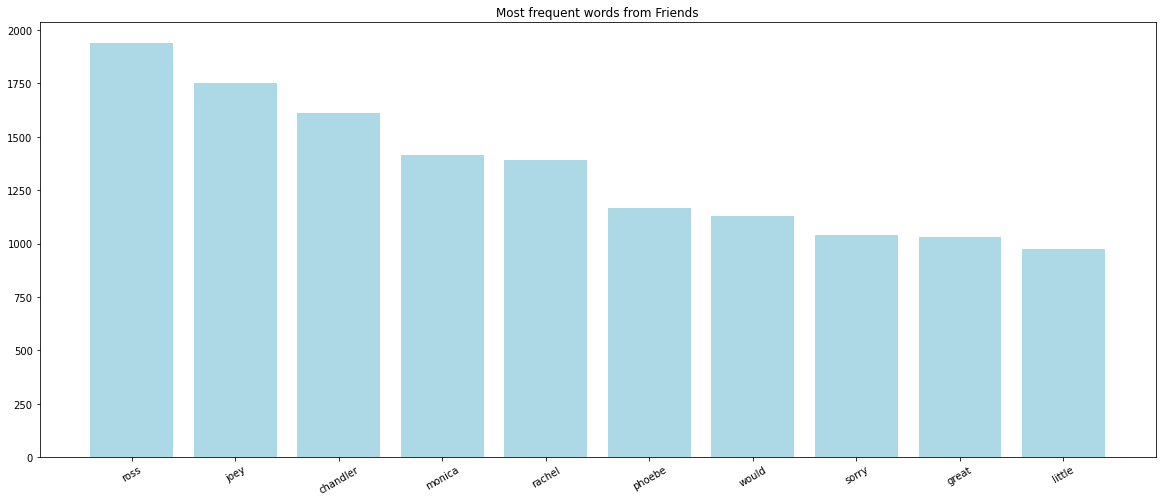

In [17]:
fig, ax = plt.subplots(figsize=(20, 8))
words_freq = plt.bar(*zip(*words.items()), color='lightblue')
ax.set_title("Most frequent words from Friends")
plt.xticks(rotation=30)
plt.show()